# Pokemon dataset of seaborn
#### In this Notebook, I have performed Exploratory Data Analysis(EDA), Feature Engineering and Model Fitting

> I have used numpy, pandas, seaborn and matplotlib libraries for visulization in EDA

> In Feature Engineering, I imputed missing values, removed outliers and Labeled categorical features and scaled all values.

> In Model Fitting Section, I used most basic classification algorithm i.e. Logistic Regression and one of the most complex classification algorithm i.e. Random Forrest Classifier

#### importing libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### loading data-set

In [3]:
df=pd.read_csv('../input/pokemon/Pokemon.csv')

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Exploratory Data Analysis

In [5]:
# NUMERICAL FEATURE
# CATEGORICAL FEATURE

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


##### here we can see we have:
> Total 800 Rows and 12 columns 

In [6]:
print(len(df['Name'].unique()))
print('We can see here, coulmn Name has all unique features')
print('='*50)

print(df['Type 1'].unique())
print(len(df['Type 1'].unique()))
print('='*50)

print(df['Type 2'].unique())
print(len(df['Type 2'].unique()))
print('='*50)

print(df['Generation'].unique())
print(len(df['Generation'].unique()))
print('this is a discrete feature BTW')
print('='*50)

# we have:
# 3 categorical feature
# 1 binary (target feature) {we will convert it into discrete afterwards}
# 1 discrete feature
# 7 continous feature

800
We can see here, coulmn Name has all unique features
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
18
['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
19
[1 2 3 4 5 6]
6
this is a discrete feature BTW


In [7]:
df['Legendary'].replace(True,1,inplace=True)
df['Legendary'].replace(False,0,inplace=True)

In [8]:
categorical = [feature for feature in df.columns if df[feature].dtype == 'O' and feature not in 'Name']
categorical

['Type 1', 'Type 2']

In [9]:
continous = [feature for feature in df.columns if df[feature].dtype != 'O' and feature not in 'Generation'+'Legendary']
print(continous)
discrete = ['Generation','Legendary']
print(discrete)

['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
['Generation', 'Legendary']


In [10]:
df.Legendary.unique()

array([0., 1.])

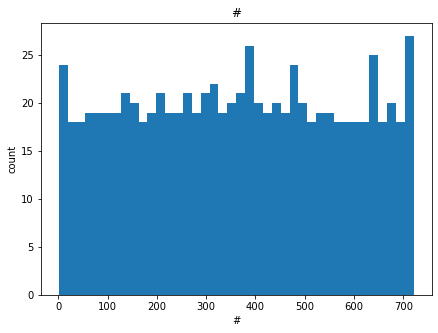

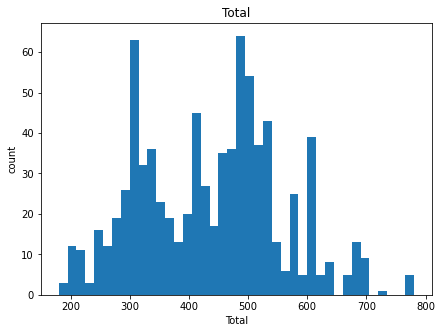

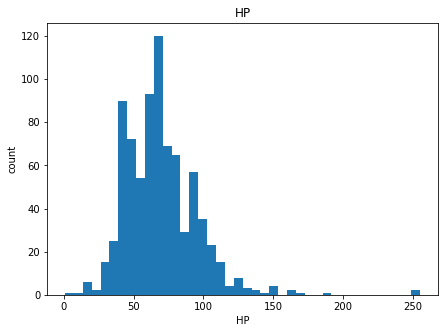

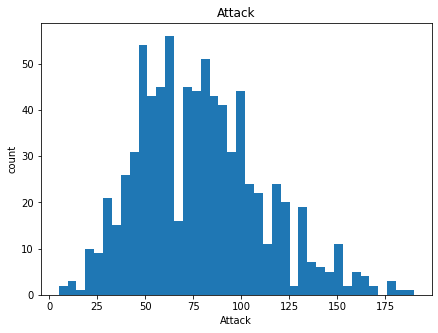

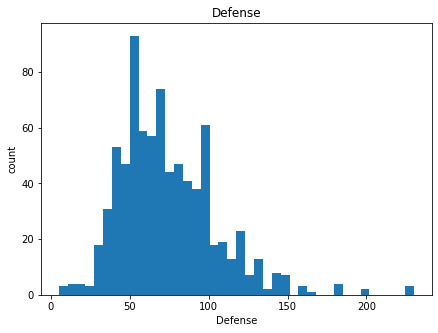

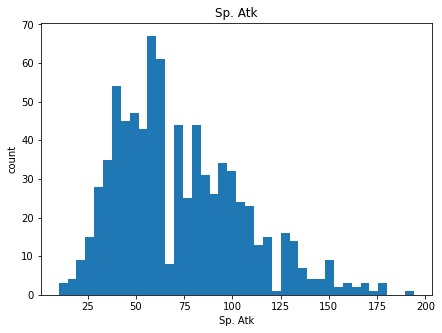

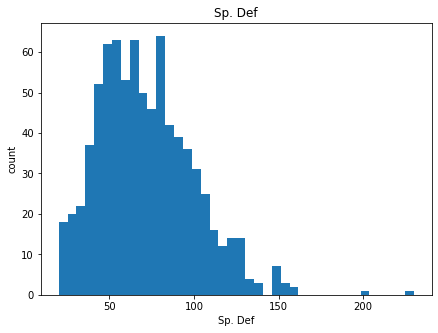

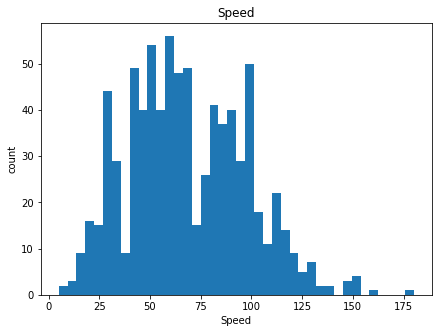

In [11]:
# Graphs for continous numerical features
# we make this graph for finding if any type of distribution is here in the feature

for feature in continous:
  plt.figure(figsize=(7,5))
  plt.hist(df[feature],bins=40)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()

#### no gaussion or log normal distribution found in above graphs...

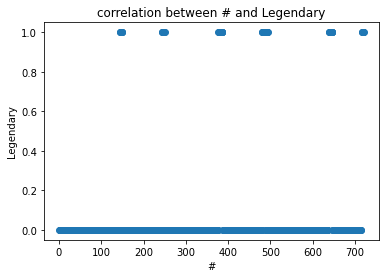

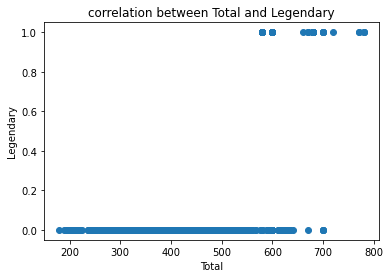

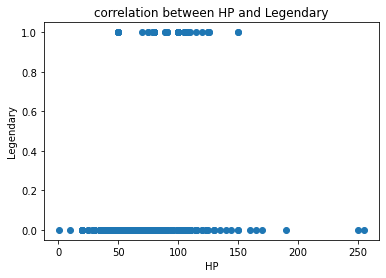

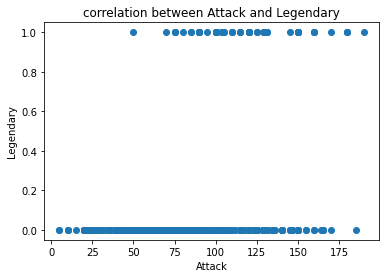

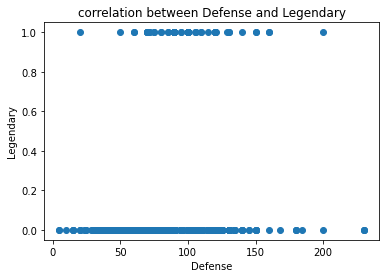

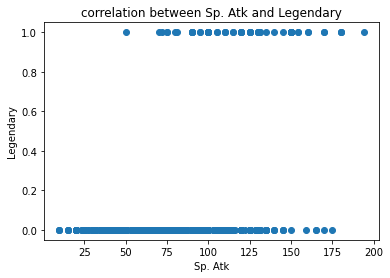

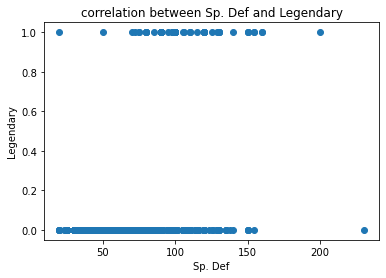

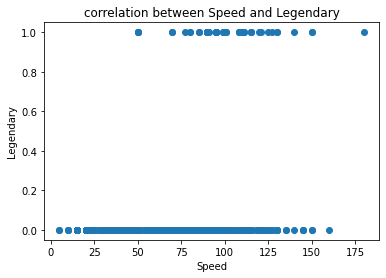

In [12]:
# ralation of continous with target with help of scatter plot

for feature in continous:
    plt.scatter(df[feature],df['Legendary'])
    plt.title('correlation between ' +feature+ ' and Legendary')
    plt.xlabel(feature)
    plt.ylabel('Legendary')
    plt.show()

In [13]:
gb=df.groupby('Type 1')
print(gb['Legendary'].value_counts())
print('='*65)
gb=df.groupby('Type 2')
gb['Legendary'].value_counts()

Type 1    Legendary
Bug       0.0           69
Dark      0.0           29
          1.0            2
Dragon    0.0           20
          1.0           12
Electric  0.0           40
          1.0            4
Fairy     0.0           16
          1.0            1
Fighting  0.0           27
Fire      0.0           47
          1.0            5
Flying    0.0            2
          1.0            2
Ghost     0.0           30
          1.0            2
Grass     0.0           67
          1.0            3
Ground    0.0           28
          1.0            4
Ice       0.0           22
          1.0            2
Normal    0.0           96
          1.0            2
Poison    0.0           28
Psychic   0.0           43
          1.0           14
Rock      0.0           40
          1.0            4
Steel     0.0           23
          1.0            4
Water     0.0          108
          1.0            4
Name: Legendary, dtype: int64


Type 2    Legendary
Bug       0.0           3
Dark      0.0          19
          1.0           1
Dragon    0.0          14
          1.0           4
Electric  0.0           5
          1.0           1
Fairy     0.0          21
          1.0           2
Fighting  0.0          22
          1.0           4
Fire      0.0           9
          1.0           3
Flying    0.0          84
          1.0          13
Ghost     0.0          13
          1.0           1
Grass     0.0          25
Ground    0.0          34
          1.0           1
Ice       0.0          11
          1.0           3
Normal    0.0           4
Poison    0.0          34
Psychic   0.0          28
          1.0           5
Rock      0.0          14
Steel     0.0          21
          1.0           1
Water     0.0          13
          1.0           1
Name: Legendary, dtype: int64

#### visualizing the above data below

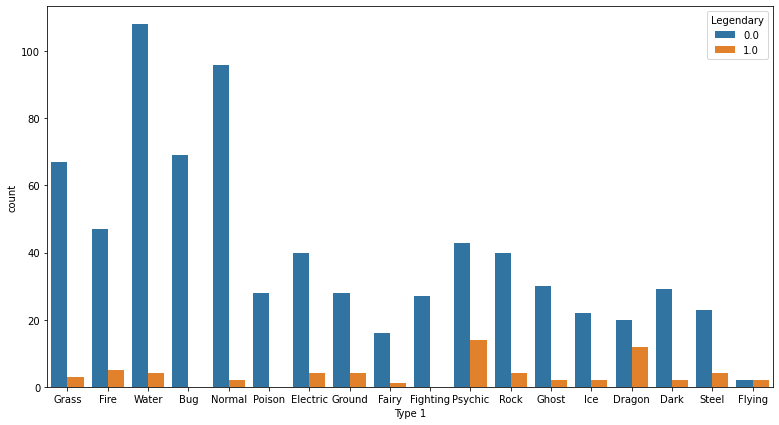

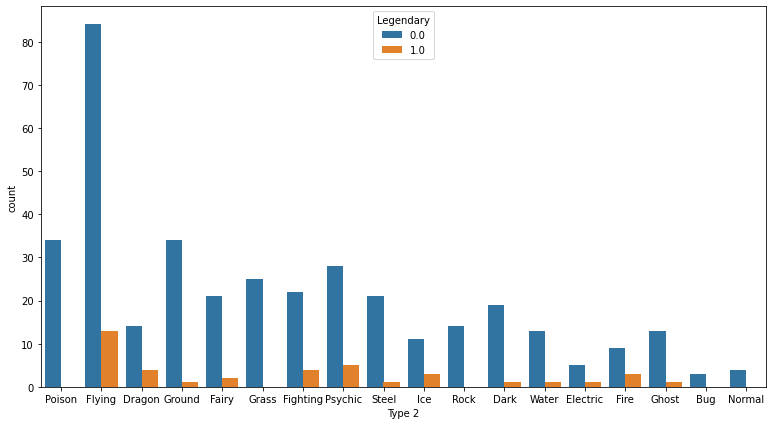

In [14]:
# Graph for categorical features

plt.figure(figsize=(13,7))
sns.countplot(data=df,x='Type 1',hue='Legendary')
plt.show()
plt.figure(figsize=(13,7))
sns.countplot(data=df,x='Type 2',hue='Legendary')
plt.show()

In [15]:
gb = df.groupby('Generation')
gb['Legendary'].value_counts()

Generation  Legendary
1           0.0          160
            1.0            6
2           0.0          101
            1.0            5
3           0.0          142
            1.0           18
4           0.0          108
            1.0           13
5           0.0          150
            1.0           15
6           0.0           74
            1.0            8
Name: Legendary, dtype: int64

#### Visualizing the above data below

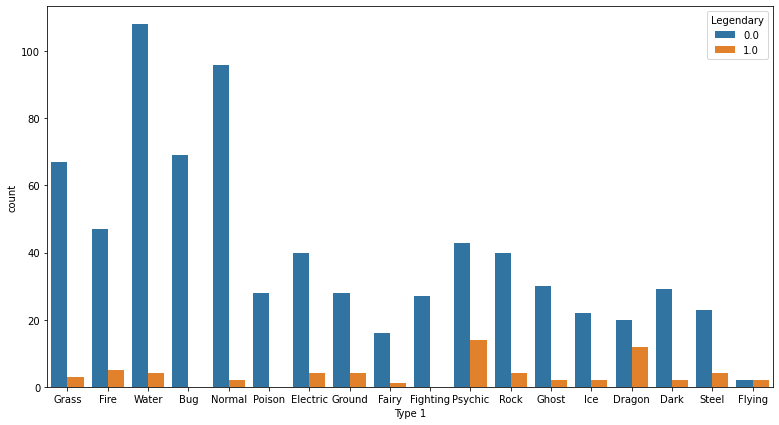

In [16]:
# Graphs for discrete numerical features

plt.figure(figsize=(13,7))
sns.countplot(data=df,x='Type 1',hue='Legendary')
plt.show()

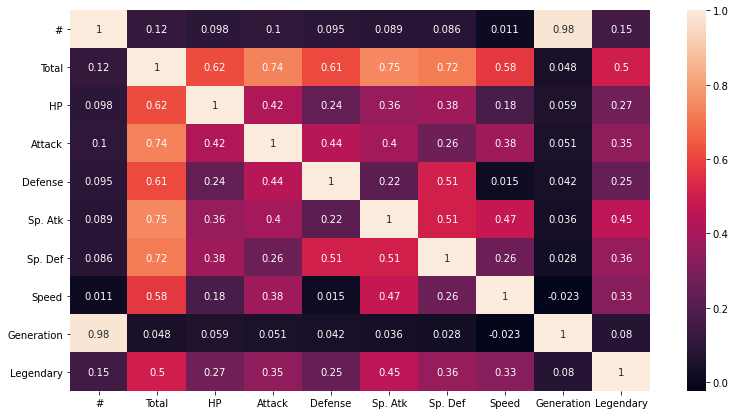

In [17]:
# this graph lets us see corelation of features, between features and with the target feature.

plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True)

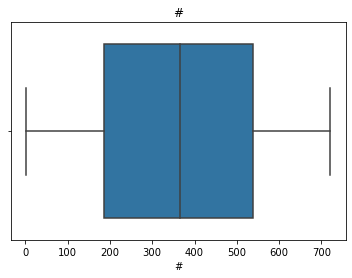

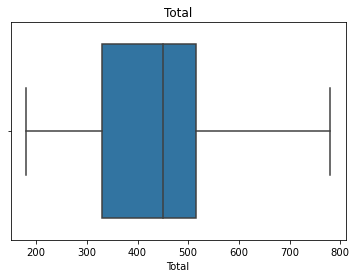

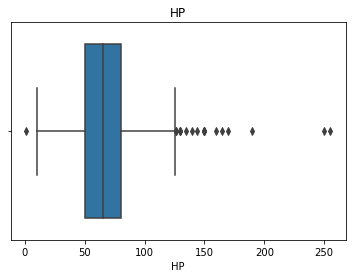

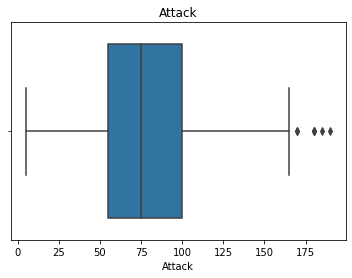

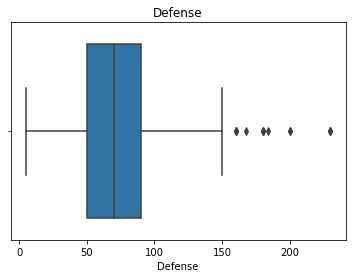

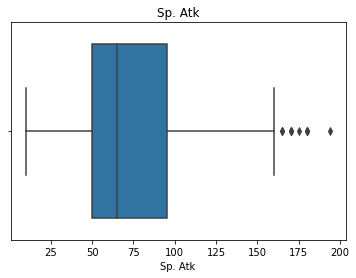

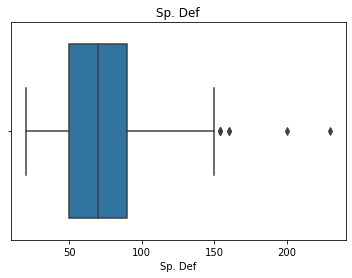

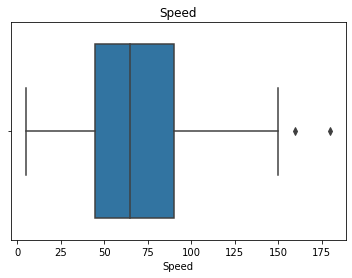

In [18]:
# checking outliers with help of box plot 

for feature in continous:
    sns.boxplot(x=feature,data=df)
    plt.title(feature)
    plt.show()

# Feature Engineering

In [19]:
df=pd.read_csv('../input/pokemon/Pokemon.csv')

df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [20]:
df.describe()

df['Type 2']
# this is a mathematical way to see find outliers, and many other things we can infer from it!

0      Poison
1      Poison
2      Poison
3      Poison
4         NaN
        ...  
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 800, dtype: object

In [21]:
# importing all the necessary libraries for of feature engineering

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,handle_unknown='error')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False) #setting with_mean False, is for a reason !


In [22]:
# here, we have missing values in Type 2, what we will do here is:
# fill it with 'No Type' and not with mode. As there are many pokemons with no Type 2 abilty.

df.iloc[:,3].fillna(value='No Type', inplace=True)
print(df.head(10))

   #                       Name Type 1   Type 2  Total  HP  Attack  Defense  \
0  1                  Bulbasaur  Grass   Poison    318  45      49       49   
1  2                    Ivysaur  Grass   Poison    405  60      62       63   
2  3                   Venusaur  Grass   Poison    525  80      82       83   
3  3      VenusaurMega Venusaur  Grass   Poison    625  80     100      123   
4  4                 Charmander   Fire  No Type    309  39      52       43   
5  5                 Charmeleon   Fire  No Type    405  58      64       58   
6  6                  Charizard   Fire   Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire   Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire   Flying    634  78     104       78   
9  7                   Squirtle  Water  No Type    314  44      48       65   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60

In [23]:
# Here, I dropped all unique features as they are not going get us prediction.

df.drop(columns=['Name','#'],inplace=True)

In [24]:
# Here, I encoded all the values of categorical feature to numerical feature

temp = encoder.fit_transform(df.iloc[:,0:2])
temp = pd.DataFrame(temp)
df = pd.concat([df,temp],axis=1)

In [25]:
# Let's see if everything is A-OK

df 

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,27,28,29,30,31,32,33,34,35,36
0,Grass,Poison,318,45,49,49,65,65,45,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Grass,Poison,405,60,62,63,80,80,60,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Grass,Poison,525,80,82,83,100,100,80,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Grass,Poison,625,80,100,123,122,120,80,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Fire,No Type,309,39,52,43,60,50,65,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,Rock,Fairy,700,50,160,110,160,110,110,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,Psychic,Ghost,600,80,110,60,150,130,70,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,Psychic,Dark,680,80,160,60,170,130,80,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Now Split X and y

y = df['Legendary']
X = df.drop(columns=['Type 1','Type 2','Legendary'])

In [27]:
# Let's Scale our X for better model ! I have used StandardScaler, you can use any other here and see interesting effects !

temp=scaler.fit_transform(X)
X = pd.DataFrame(temp)

In [28]:
# Splitting our data for into train and test, for testing our accuracy

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
290,3.294741,2.351217,2.158025,1.604415,3.057932,1.797816,2.238114,1.806955,3.562105,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
158,4.837847,3.526825,3.082892,2.887947,3.822415,3.056288,3.098928,0.602318,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
69,3.336446,1.567478,1.079012,0.962649,3.669519,2.516943,3.615415,0.602318,0.000000,0.0,...,0.0,0.0,0.0,2.001226,0.0,0.000000,0.0,0.0,0.0,0.0
517,4.504202,2.939021,3.791957,2.149916,2.905036,3.056288,3.271090,2.409273,0.000000,0.0,...,0.0,0.0,0.0,2.001226,0.0,0.000000,0.0,0.0,0.0,0.0
131,3.836913,1.567478,1.387301,2.085740,3.057932,4.314759,3.098928,0.602318,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.921258,2.155282,1.541446,2.085740,5.351381,3.415851,5.164879,0.602318,0.000000,0.0,...,0.0,0.0,0.0,2.001226,0.0,0.000000,0.0,0.0,0.0,0.0
106,2.710863,1.175608,3.237037,2.887947,0.764483,0.898908,1.721626,0.602318,0.000000,0.0,...,0.0,0.0,0.0,2.001226,0.0,0.000000,0.0,0.0,0.0,0.0
270,5.671959,4.153816,4.007760,2.887947,3.363725,5.537274,3.098928,1.204637,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
435,2.577405,1.724225,1.788077,1.411885,1.773601,1.582078,2.100384,2.409273,0.000000,0.0,...,0.0,0.0,0.0,2.001226,0.0,0.000000,0.0,0.0,0.0,0.0


# Model

# Logistic Regression

In [30]:
# As our target is to classify, if the pokemon is legendary or not, We are going to use LogisticRegression !

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
y_pred = lg.predict(X_test)

In [32]:
# Let's see our accuracy on train data !

lg.score(X_train,y_train)

0.9683333333333334

In [33]:
# Now, Let's check our accuracy on test data !

lg.score(X_test,y_test)

0.955

In [34]:
# Checking our Model by 

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[182,   5],
       [  4,   9]])

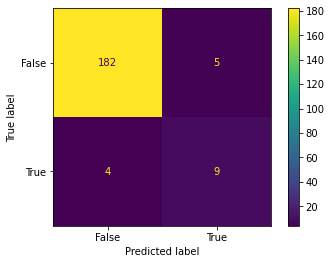

In [35]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lg, X_test, y_test)

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred = rfc.predict(X_test)

In [42]:
# Let's see our accuracy on train data !

rfc.score(X_train,y_train)

1.0

In [43]:
# Now, Let's check our accuracy on test data !

rfc.score(X_test,y_test)

0.95

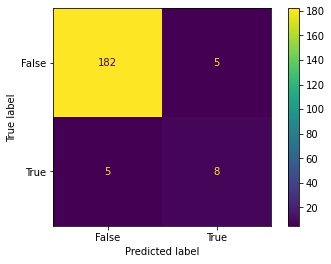

In [44]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, X_test, y_test)